# 5. 평균모멘텀 스코어 분산투자 전략(채권혼합)

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

### csv 파일 읽어오기

In [2]:
import os
print (os.getcwd())

C:\DualMomentum\BackTesting


In [3]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_daily_data.csv", encoding="utf-8")
df_bond = pd.read_csv("..\\Data\\KOSEF국고채10년_Daily_2011data.csv", encoding="utf-8")

### Index는 datetime 형으로 변환하기

In [4]:
df_kodex.index = pd.to_datetime(df_kodex["Date"])
df_bond.index = pd.to_datetime(df_bond["Date"])

# 시작하는 날짜 지정하기, 채권 시작하는 날이 2011-12월이여서 주식도 시작날짜를 맞춤
df_kodex = df_kodex["2011-12":]
df_bond = df_bond["2011-12":]

df_kodex = df_kodex["Close"]
df_bond = df_bond["Close"]

KODEX = df_kodex/df_kodex[0]  #re-scale
BOND = df_bond/df_bond[0]  #re-scale

In [5]:
# 일별 수익률
kodex_momentum_return = fl.MomentumDailyReturn(KODEX)  # 모멘텀 수익률은 내일 청산/금일 진입
bond_momentum_return = fl.MomentumDailyReturn(BOND)  # 모멘텀 수익률은 내일 청산/금일 진입

In [6]:
# KODEX 평균모멘텀 스코어
kodex_average_score = pd.Series(fl.AverageMomentum(KODEX,12), index=KODEX.index, name="KODEX")
# BOND 평균모멘텀 스코어
bond_average_score = pd.Series(fl.AverageMomentum(BOND,12), index=BOND.index, name="BOND")

dual_ratio = pd.concat([kodex_average_score,bond_average_score],axis=1).dropna()
kodex_ratio = dual_ratio["KODEX"]/ (dual_ratio["KODEX"] + dual_ratio["BOND"])
bond_ratio = 1 - kodex_ratio

dual_entry = (kodex_momentum_return * kodex_ratio) + (bond_momentum_return * bond_ratio)  # kodex, bond 투자비율에 맞게 진입
DUAL = np.cumprod(dual_entry)  # 누적 수익률

In [7]:
kodex = fl.Portfolio(KODEX,"KODEX")
bond = fl.Portfolio(BOND,"BOND")
dual = fl.Portfolio(DUAL,"DUAL")

result = pd.concat([kodex,bond,dual],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.000000,1.266932,2.6637,0.1341,-22.2109,0.0203
BOND,1.000000,1.372541,3.5811,0.1135,-8.6172,0.0681
DUAL,1.001932,1.211847,2.1360,0.0799,-9.5377,0.0272


### 그래프

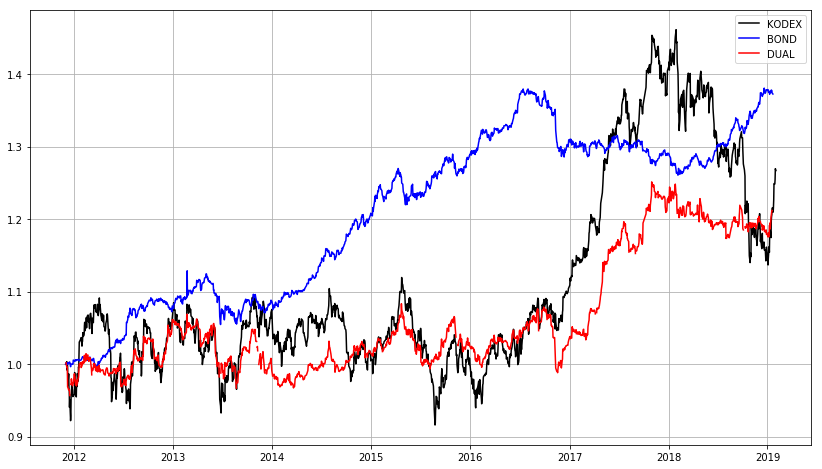

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(KODEX,color="Black",label="KODEX");
ax.plot(BOND,color="Blue",label="BOND");
ax.plot(DUAL,color="Red",label="DUAL");
ax.legend()
ax.grid()